In [1]:
# Import the Pandas library
import pandas as pd
import numpy as np
import uuid

# The files from 01-22-2020 to
#
#

jan_file_paths = [
    "01-22-2020.csv",
    "01-23-2020.csv",
    "01-24-2020.csv",
    "01-25-2020.csv",
    "01-26-2020.csv",
    "01-27-2020.csv",
    "01-28-2020.csv",
    "01-29-2020.csv",
    "01-30-2020.csv",
    "01-31-2020.csv"
]
feb_file_paths = [
    "02-01-2020.csv",
    "02-02-2020.csv",
    "02-03-2020.csv",
    "02-04-2020.csv",
    "02-05-2020.csv",
    "02-06-2020.csv",
    "02-07-2020.csv",
    "02-08-2020.csv",
    "02-09-2020.csv",
    "02-10-2020.csv",
    "02-11-2020.csv",
    "02-12-2020.csv",
    "02-13-2020.csv",
    "02-14-2020.csv",
    "02-15-2020.csv",
    "02-16-2020.csv",
    "02-17-2020.csv",
    "02-18-2020.csv",
    "02-19-2020.csv",
    "02-20-2020.csv",
    "02-21-2020.csv",
    "02-22-2020.csv",
    "02-23-2020.csv",
    "02-24-2020.csv",
    "02-25-2020.csv",
    "02-26-2020.csv",
    "02-27-2020.csv",
    "02-28-2020.csv",
    "02-29-2020.csv"]

mar_file_paths = [
    "03-01-2020.csv",
    "03-02-2020.csv",
    "03-03-2020.csv",
    "03-04-2020.csv",
    "03-05-2020.csv",
    "03-06-2020.csv",
    "03-07-2020.csv",
    "03-08-2020.csv",
    "03-09-2020.csv",
    "03-10-2020.csv",
    "03-11-2020.csv",
    "03-12-2020.csv",
    "03-13-2020.csv",
    "03-14-2020.csv",
    "03-15-2020.csv",
    "03-16-2020.csv",
    "03-17-2020.csv",
    "03-18-2020.csv",
    "03-19-2020.csv",
    "03-20-2020.csv",
    "03-21-2020.csv",
    "03-22-2020.csv",
    "03-23-2020.csv",
    "03-24-2020.csv",
    "03-25-2020.csv",
    "03-26-2020.csv",
    "03-27-2020.csv",
    "03-28-2020.csv",
    "03-29-2020.csv",
    "03-30-2020.csv",
    "03-31-2020.csv"]

apr_file_paths = [
    "04-01-2020.csv",
    "04-02-2020.csv",
    "04-03-2020.csv",
    "04-04-2020.csv",
    "04-05-2020.csv",
    "04-06-2020.csv",
    "04-07-2020.csv",
    "04-08-2020.csv",
    "04-09-2020.csv",
    "04-10-2020.csv",
    "04-11-2020.csv",
    "04-12-2020.csv",
    "04-13-2020.csv",
    "04-14-2020.csv",
    "04-15-2020.csv",
    "04-16-2020.csv",
    "04-17-2020.csv",
    "04-18-2020.csv",
    "04-19-2020.csv",
    "04-20-2020.csv",
    "04-21-2020.csv",
    "04-22-2020.csv",
    "04-23-2020.csv",
    "04-24-2020.csv",
    "04-25-2020.csv",
    "04-26-2020.csv",
    "04-27-2020.csv",
    "04-28-2020.csv",
    "04-29-2020.csv",
    "04-30-2020.csv"]

may_file_paths = [
    "05-01-2020.csv",
    "05-02-2020.csv",
    "05-03-2020.csv",
    "05-04-2020.csv"]

# utility functions
def cleanse_data(covid_date_df):
    #pattern-1
    if 'Province/State' in covid_date_df:
        return covid_date_df.dropna(
        subset=['Province/State', 'Country/Region', 'Last Update', 'Confirmed'])

    # since March-22nd the pattern of the covid 19 changed since it was declared as a pandemic.
    elif 'Province_State' in covid_date_df:
        return covid_date_df.dropna(
            subset=['Province_State', 'Country_Region', 'Last_Update', 'Confirmed'])


file_paths = jan_file_paths + feb_file_paths + mar_file_paths + apr_file_paths + may_file_paths

master_dfs = []

# stage_1
for index in range(0, len(file_paths), 1):
    print(file_paths[index])
    file_path = "data/raw/csse_covid_19_daily_reports/" + file_paths[index]
    print(file_path)

    temp_df = pd.read_csv(file_path)
    # inject unique id guid
    temp_df['unique_id'] = [uuid.uuid4() for _ in range(len(temp_df.index))]

    # write and check if guid is injected
    temp_df.to_csv("data/stage_1/test" + str(index) + ".csv", index=False, header=True)

    no_null_covid_date_df = cleanse_data(temp_df)
    master_dfs.append(no_null_covid_date_df)

print(f"Total dataframes is {len(master_dfs)}")

# stage_2
post_concat_df = pd.concat(master_dfs, join='outer', ignore_index=False, keys=None,
                           levels=None, names=None, verify_integrity=False, copy=True)
post_concat_df.to_csv("data/stage_2/master-covid.csv", index=False, header=True)

# stage_3
#merging, renaming columns

print('Attempting to write stage_2_1 file')
post_concat_df.to_csv("data/stage_2_1/master-covid-v2.csv", index=False, header=True)

# cannot use dropna, beacause no single record will have both Country_Region and Country/Region
#post_concat_df_cleanse = post_concat_df.dropna(subset=['Country/Region', 'Country_Region'])

post_concat_df['Country_Region'] = post_concat_df['Country_Region'].replace({np.nan: ''})
post_concat_df['Country/Region'] = post_concat_df['Country/Region'].replace({np.nan: ''})

post_concat_df['Province_State'] = post_concat_df['Province_State'].replace({np.nan: ''})
post_concat_df['Province/State'] = post_concat_df['Province/State'].replace({np.nan: ''})

post_concat_df['Country'] = post_concat_df[['Country/Region', 'Country_Region']].apply(lambda x: ''.join(x.map(str)), axis=1)
post_concat_df['State'] = post_concat_df[['Province/State', 'Province_State']].apply(lambda x: ''.join(x.map(str)), axis=1)

del post_concat_df['Country_Region']
del post_concat_df['Country/Region']
del post_concat_df['Province_State']
del post_concat_df['Province/State']

#now reorder the columns get country, state and confirmed as first 3 columns
post_concat_df = post_concat_df[['unique_id','Country', 'State', 'Last Update', 'Confirmed', 'Deaths', 'Recovered']]

print('Attempting to write stage_2_2 file')
post_concat_df.to_csv("data/stage_2_2-final/master-covid-v2-final.csv", index=False, header=True)
print('Final covid-19 file successfully written....')


01-22-2020.csv
data/raw/csse_covid_19_daily_reports/01-22-2020.csv
01-23-2020.csv
data/raw/csse_covid_19_daily_reports/01-23-2020.csv
01-24-2020.csv
data/raw/csse_covid_19_daily_reports/01-24-2020.csv
01-25-2020.csv
data/raw/csse_covid_19_daily_reports/01-25-2020.csv
01-26-2020.csv
data/raw/csse_covid_19_daily_reports/01-26-2020.csv
01-27-2020.csv
data/raw/csse_covid_19_daily_reports/01-27-2020.csv
01-28-2020.csv
data/raw/csse_covid_19_daily_reports/01-28-2020.csv
01-29-2020.csv
data/raw/csse_covid_19_daily_reports/01-29-2020.csv
01-30-2020.csv
data/raw/csse_covid_19_daily_reports/01-30-2020.csv
01-31-2020.csv
data/raw/csse_covid_19_daily_reports/01-31-2020.csv
02-01-2020.csv
data/raw/csse_covid_19_daily_reports/02-01-2020.csv
02-02-2020.csv
data/raw/csse_covid_19_daily_reports/02-02-2020.csv
02-03-2020.csv
data/raw/csse_covid_19_daily_reports/02-03-2020.csv
02-04-2020.csv
data/raw/csse_covid_19_daily_reports/02-04-2020.csv
02-05-2020.csv
data/raw/csse_covid_19_daily_reports/02-05-2020

/Users/a.joy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:161: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



Attempting to write stage_2_1 file
Attempting to write stage_2_2 file
Final covid-19 file successfully written....


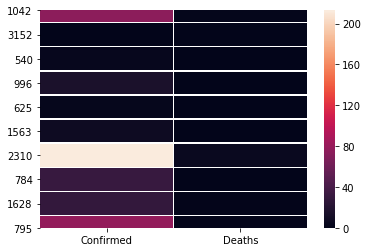

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

uniform_data = np.random.rand(10, 10)
test_concat_df = post_concat_df.sample(10) 

test_concat_df.head(15)

post_concat_df = post_concat_df[['unique_id','Country', 'State', 'Last Update', 'Confirmed', 'Deaths', 'Recovered']]

test_concat_df2 = test_concat_df[[ 'Confirmed', 'Deaths']]
ax = sns.heatmap(test_concat_df2, linewidth=0.5)
plt.show()